### ORC (Optical Character Recognition)

This OCR app will be used to extract text from an image of handwritten notes.

* **Step1:** Take image (Handwritten Notes)
* **Step2:** Process the image (Computer Vision)
* **Step3:** LLM (Role assigned as OCR)

In [1]:
#pip install opencv-python

In [27]:
import cv2
import matplotlib.pyplot as plt
import os
import google.generativeai as genai
from PIL import Image

In [66]:
image = cv2.imread(r'/Users/chetan/Desktop/GenAI Residency/Projects/MOM-Generator/img3.jpeg') # right now it is a BGR image (need to be converted to RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR --> RGB
image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) # RGB --> Greyscale
_,image_bw = cv2.threshold(image_gray,150,255,cv2.THRESH_BINARY) # Black & White  (File Name, Threshold)

In [67]:
# Its a colour image (3D)

image_bw.shape

(1600, 738)

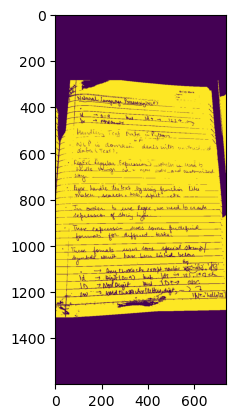

In [68]:
plt.imshow(image_bw)
plt.show()

cv2.imshow("Grey Image",image_gray)
cv2.imshow("BW Image",image_bw)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [69]:
# The image that cv2 has given is numpy array format, we need to convert it to image object
final_image = Image.fromarray(image_bw)

In [70]:
# Configue LLM
from dotenv import load_dotenv
load_dotenv()
gemini_key = os.getenv('GOOGLE_API_KEY1')
genai.configure(api_key=gemini_key)
model = genai.GenerativeModel('gemini-2.5-flash-lite',
                              generation_config={'temperature':0.5})

In [71]:
prompt = '''
<Role> You are an OCR (Optical Character Recognition) application.
<Goal> Identify the characters in handwritten notes.
<Context> User has provided the image of handwritten notes.
<Instructions>
* Do not generate any new content
* Make sure that all the words are from english language
* You can complete a word which is not recognized.
* Output should be well formatted

'''

In [72]:
response = model.generate_content([prompt,final_image])
print(response.text)  

Natural Language Processing (NLP)

* Id → 0-9 but 12+ → 1234..any
* Iw → word characters

Handling Text Data in Python

* NLP is domain deals with unstructured data (Text).

* RegEx (Regular Expression) which is used to handle strings in a more simple and customized way.

* Regex handle the text by using function like match, search, sub, split etc.

* In order to use Regex, we need to create expression of String type.

* These expression uses some predefined formats for different tasks.

* These formats uses some Special String/ symbols which have been listed below:
    * → Any character except newline
    * Id → Digit (0-9) but \d+ → 123, 149 etc.
    * ID → Non Digit but \D+ → abc
    * lw → Word characters (letters, digits, - ) ?
        * \w+ : 'hello123'


### Extracting text from word

In [74]:
pip install python-docx

  Using cached python_docx-1.2.0-py3-none-any.whl.metadata (2.0 kB)
Using cached python_docx-1.2.0-py3-none-any.whl (252 kB)
Note: you may need to restart the kernel to use updated packages.


In [75]:
from docx import Document

In [76]:
file = Document('/Users/chetan/Desktop/My Drive/Resume and CV/CLs/EXL_Cover Letter.docx')

In [80]:
doc_text = ''
for p in file.paragraphs:
    doc_text = doc_text+p.text+'\n'

In [81]:
doc_text

'Dear Hiring Manager,\nI am writing to apply for the Analytics Consultant position in the Data Science & Analytics department. I am interested in this role as it closely aligns with my academic background and my interest in analytics and model evaluation within the credit risk domain.\nMy understanding of the role includes performing independent validation and monitoring of credit risk models, assessing model validation and monitoring methodologies, reviewing assumptions and limitations, and evaluating data quality. I am familiar with conducting conceptual soundness reviews, quantitative testing, and outcome analysis as part of model validation processes.\nI have worked with model performance evaluation metrics such as Gini, KS, AUC, PSI, stability analysis, and back-testing to assess model reliability and ongoing performance. I am comfortable supporting performance monitoring activities and documenting results in line with defined model documentation standards.\nI have hands-on experi

### FILE MIMEs

| File Type   | Extension        | MIME Type                                                                 |
| ----------- | ---------------- | ------------------------------------------------------------------------- |
| Plain text  | `.txt`           | `text/plain`                                                              |
| HTML        | `.html`          | `text/html`                                                               |
| CSV         | `.csv`           | `text/csv`                                                                |
| JSON        | `.json`          | `application/json`                                                        |
| PDF         | `.pdf`           | `application/pdf`                                                         |
| ZIP         | `.zip`           | `application/zip`                                                         |
| JPEG image  | `.jpg` / `.jpeg` | `image/jpeg`                                                              |
| PNG image   | `.png`           | `image/png`                                                               |
| GIF         | `.gif`           | `image/gif`                                                               |
| MP3 audio   | `.mp3`           | `audio/mpeg`                                                              |
| MP4 video   | `.mp4`           | `video/mp4`                                                               |
| Excel       | `.xls`           | `application/vnd.ms-excel`                                                |
| Excel (new) | `.xlsx`          | `application/vnd.openxmlformats-officedocument.spreadsheetml.sheet`       |
| Word        | `.doc`           | `application/msword`                                                      |
| Word (new)  | `.docx`          | `application/vnd.openxmlformats-officedocument.wordprocessingml.document` |